<a href="https://colab.research.google.com/github/hawk20434/MGPU_AI/blob/main/MGPU_COPM_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**Шаг - 1.** Установка в рабочее окружение нужных библиотек

In [ ]:
!pip install ultralytics

**Шаг - 2.** Импорт в рабочую область загруженных ранее библиотек

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import yaml

**Шаг - 3.** Загрузка собственного изображения

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving f4dLH08-NBE.jpg to f4dLH08-NBE.jpg


**Шаг - 4.** Первичная настройка модели

Документация по модели: https://docs.ultralytics.com/tasks/pose/

In [ ]:
model = YOLO('yolov8n-pose.pt')

- conf_threshold — это порог уверенности, ниже которого объекты не будут учитываться в результатах. Например, если conf_threshold = 0.5, это означает, что только те объекты, для которых модель уверена на 50% и более, будут включены в результаты.
- iou_threshold (по умолчанию 0.5): Чем выше значение, тем более строгая модель для принятия решения о том, что два объекта — это один и тот же объект.
- max_det (по умолчанию 50): Ограничивает максимальное количество объектов, которые модель может детектировать, что может быть полезно, если на изображении слишком много объектов.

In [ ]:
for filename in uploaded.keys():
    img_path = filename

iou_threshold = 0.5  # Порог для пересечения прямоугольников
max_det = 50  # Максимальное количество объектов для детекции
conf_threshold = 0.5  # Порог уверенности
results = model(img_path, conf=conf_threshold, iou=iou_threshold, max_det=max_det)


image 1/1 /content/f4dLH08-NBE.jpg: 448x640 5 persons, 166.5ms
Speed: 3.8ms preprocess, 166.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


**Шаг - 5.** Получения и визуализация результата

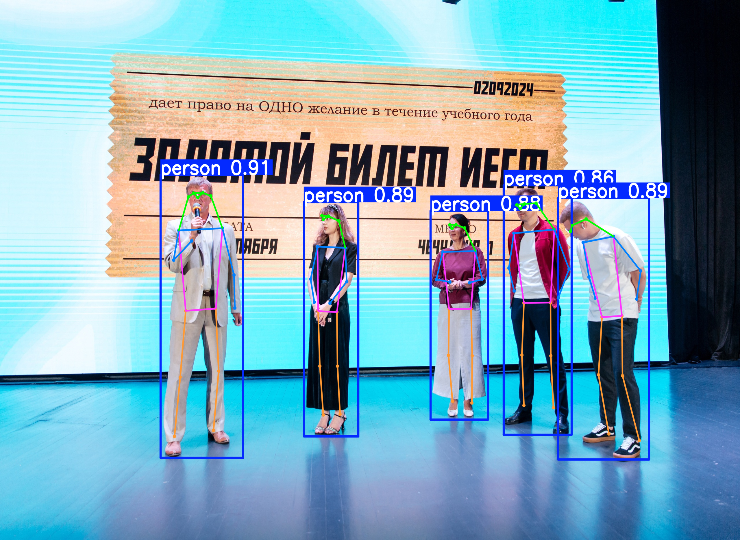

In [ ]:
annotated_img = results[0].plot()
# Можно изменить размер изображения (например, 740, 540)
resized_img = cv2.resize(annotated_img, (740, 540), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_img)

**Дополнительный шаг.** Загрузка обработанного изображения

In [ ]:
output_path = 'annotated_image.jpg'
cv2.imwrite(output_path, annotated_img)
print(f"Обработанное изображение сохранено: {output_path}")

Обработанное изображение сохранено: annotated_image.jpg
